# Intermediate Pyton

## Matplotlib

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"]=(4,3)

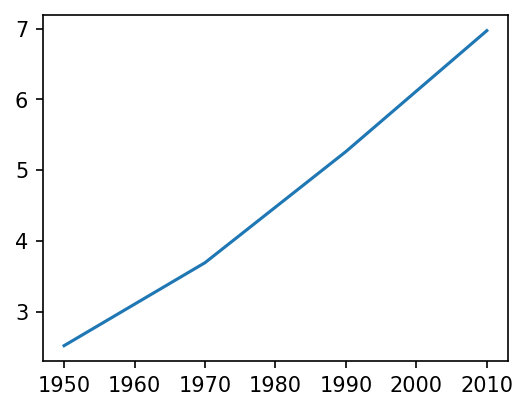

In [2]:
#Lineplot
import matplotlib.pyplot as plt

year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]
plt.plot(year, pop)
plt.show()

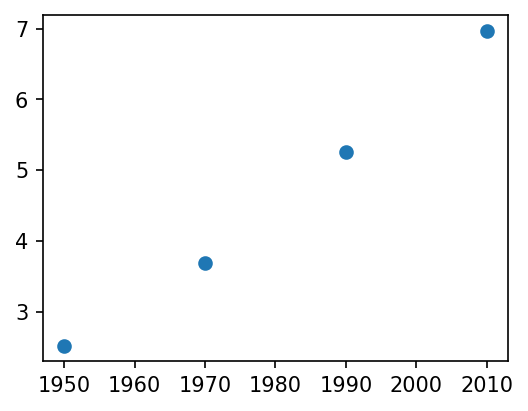

In [3]:
#Scatter plot
import matplotlib.pyplot as plt

year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]
plt.scatter(year, pop)
plt.show()
#plt.savefig('filename.png', dpi=300)# - to save the file

When we have a time scale along horizontal axis - the line plot will be our friend, however if we are trying to establish a correlation between two variables it is a better practice to use scatter plot.

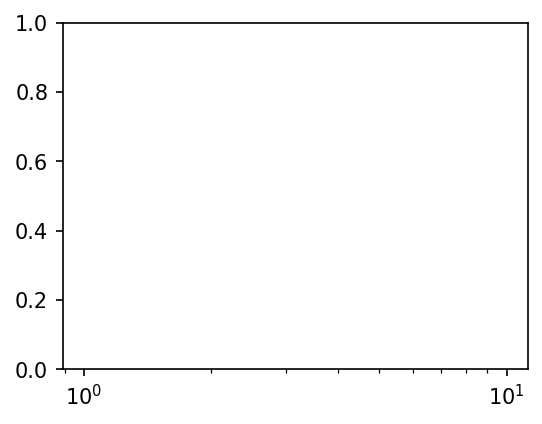

In [4]:
# Put the x-axis on a logarithmic scale
plt.xscale('log')

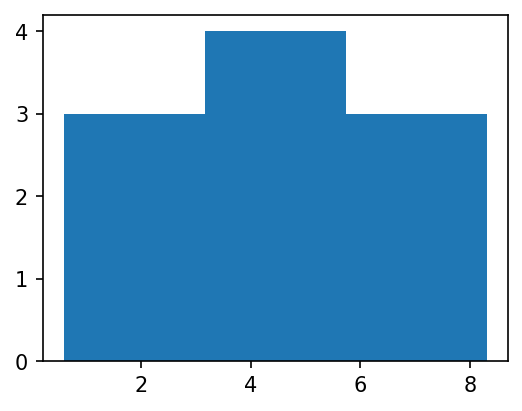

In [5]:
#Histogram - to understand the distribution of our data

import matplotlib.pyplot as plt

values = [0.6,1,5,6,7,4,8.3,5,4,3]
plt.hist(values, bins=3) #bins are set to 10 by default
plt.show()

The resolution of our graph is controled by the dpi, so we should make it higher when we are saving our graph
```plt.savefig('filename.png', dpi=300)```

In [6]:
plt.show() #displays a plot

plt.clf() #cleans it up again so you can start afresh

<Figure size 600x450 with 0 Axes>

So far we have seen that lineplot is best suited when we have dates on the x axis, scatter plot is the best option to seek correlation between two variables and histogram for understanding the distribution of our data (distribution of grades in class)

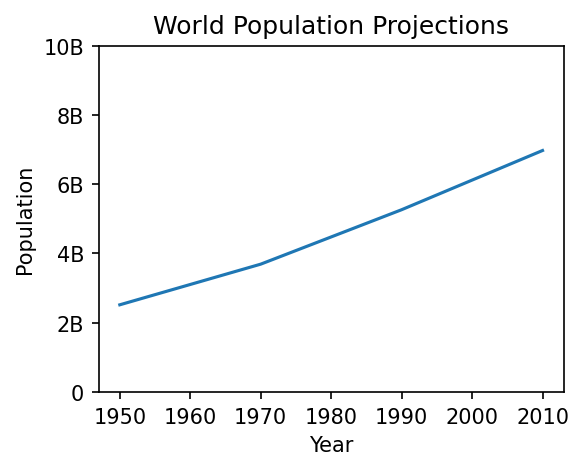

In [7]:
#Customization
import matplotlib.pyplot as plt

year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]

plt.plot(year, pop)

plt.title("World Population Projections")
plt.xlabel("Year")
plt.ylabel("Population")
plt.yticks([0,2,4,6,8,10], ['0', '2B', '4B', '6B', '8B', '10B']) #the first list are the actual values 
#and the second one are the values displayed at the graph
#plt.savefig('filename.png')

plt.show()

### Et cetera

In [ ]:
#We also have parameters for size, color and visibility of our data (or dots)
gdp_cap=[...]
life_exp=[...]
colors=[...]

plt.scatter(gdp_cap, life_exp, s = pop, c = colors, alphs = 0.8)

In [ ]:
# We can add a text by specifying its coordinates and then printing the text itself
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Add grid()
plt.grid(True)

In [10]:
import numpy as np

np_pop = np.array(pop)
np_pop = np_pop * 2

## Dictionaries and Pandas

### Dictionaries

In [11]:
# A quick reminder about index method

countries = ['spain', 'france', 'germany', 'norway']
capitals = ['madrid', 'paris', 'berlin', 'oslo']

# Get index of 'germany': ind_ger
ind_ger = countries.index('germany')
# Use ind_ger to print out capital of Germany
print(capitals[ind_ger])

berlin


In [12]:
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin', 'norway':'oslo' }

print(europe.keys())
# The keys() method returns a view object. The view object contains the keys of the dictionary, as a list.

dict_keys(['spain', 'france', 'germany', 'norway'])


Keys must be unique, they also have to be immutable

In [13]:
world = {}
#To add/change key-value pair in a dictionary
world["sealand"] = 0.000028

#To remove it
del(world["sealand"])

### Pandas

In [ ]:
import pandas as pd #built in numpy

#We can create a DataFrame from a dictionary
brics = pd.DataFrame(dict)
brics.index = ["BR", "RU", "IN", "CH", "SA"]

In [17]:
import pandas as pd

brics=pd.read_csv("databases/brics.csv", index_col=0)
#display(brics)
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


Chat GPT have created a better visualization for pandas Series for me - new_display()

In [19]:
from IPython.display import Markdown, display

def new_display(series):
    # Determine the width of each column based on the longest content
    max_index_length = max(len(str(idx)) for idx in series.index)
    max_value_length = max(len(str(val)) for val in series.values)
    max_name_length = len(series.name)
    
    # Ensure the header fits the longest content
    header_index = max(max_index_length, len("Index"))
    header_value = max(max_value_length, max_name_length)
    
    # Create the header
    header = f"| {'Index'.ljust(header_index)} | {series.name.ljust(header_value)} |"
    separator = f"|{'-' * (header_index + 2)}|{'-' * (header_value + 2)}|"
    
    # Create the rows
    rows = "\n".join([f"| {str(idx).ljust(header_index)} | {str(val).ljust(header_value)} |" for idx, val in series.items()])
    
    # Display the Markdown table
    display(Markdown(f"{header}\n{separator}\n{rows}"))

In [20]:
#By using single square brackets we transform a DataFrame into a pandas Series
new_display(brics['country'])

| Index | country      |
|-------|--------------|
| BR    | Brazil       |
| RU    | Russia       |
| IN    | India        |
| CH    | China        |
| SA    | South Africa |

In [21]:
#However if we use double square brackets it will remain a DataFrame
#P.S. that way we don't have to use GPT's function)
brics[['country']]

,country
BR,Brazil
RU,Russia
IN,India
CH,China
SA,South Africa


In [22]:
#To get row we use numbers like:
brics[1:4]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


### loc (label) and iloc (position) 

In [23]:
#Selecting rows
brics.loc[["RU"]] #we use double square brackets to get a DF

,country,capital,area,population
RU,Russia,Moscow,17.1,143.5


In [24]:
#Selecting rows and columns
brics.loc[["RU", "IN", "CH"],["country", "capital"]]

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


In [26]:
row = "RU"
column="country"

#To return a Series
brics.loc[row, column]

#To return a DF:
brics.loc[[row], [column]]

#Same applies to an iloc

,country
RU,Russia


## Logic, Control Flow and Filtering

True corresponds to 1 and False to 0

In [27]:
import numpy as np
my_house = np.array([18.0, 20.0, 10.75, 9.50])

my_house >= 18
#Behind the scenes numpy creates an array of [18, 18, 18, 18] and compares it
#returns a list of booleans

array([ True,  True, False, False])

There are three booleans operators:
- and
- or
- not

Numpy:
- np.logical_and()
- np.logical_or()
- np.logical_not()

In [28]:
# As soon as any given condition is successfull programm will stop
# In this case only 2 will be printed out and 3 will never be reached
x = 6
if x % 2 == 0:
    print("2")
elif x % 3 == 0:
    print("3")
else:
    print("none")

2


In [29]:
brics[brics['area'] > 8]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


In [30]:
brics[(brics['area'] > 8) & (brics['area'] < 10)]

#import numpy as np
#brics[np.logical_and(brics["area"] > 8, brics["area"] < 10)]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


## Loops

Nothing new on the while loop

In [31]:
#Using enumerate
fam = [1.73, 1.68, 1.71, 1.89]

for index, value in enumerate(fam):
    print(f"index {index}: {value}")

index 0: 1.73
index 1: 1.68
index 2: 1.71
index 3: 1.89


### Dictionaries

In [32]:
#dict.items() method

world = {
    "afganistan":30.55,
    "albania":2.77,
    "algeria":39.21,
}

for key, value in world.items():
    print(key, value)

afganistan 30.55
albania 2.77
algeria 39.21


### Numpy

In [33]:
#Numpy np.nditer() function for 2D arrays
import numpy as np

np_height = np.array([1.73, 1.68, 1.89, 1.79])
np_weight = np.array([65.4, 59.2, 88.4, 68.7])
meas = np.array([np_height, np_weight])

for item in np.nditer(meas):
    print(item)

# We don't have to this use for 1D nupy arrays

1.73
1.68
1.89
1.79
65.4
59.2
88.4
68.7


### Pandas DataFrame

In [35]:
import pandas as pd
brics = pd.read_csv("databases/brics.csv", index_col=0)

for label, row in brics.iterrows():
    print(label)
    print(row)
    #we can tap into a value using row.population for example

BR
country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object
RU
country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN
country           India
capital       New Delhi
area              3.286
population       1252.0
Name: IN, dtype: object
CH
country         China
capital       Beijing
area            9.597
population     1357.0
Name: CH, dtype: object
SA
country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [36]:
for label, row in brics.iterrows():
    brics.loc[label, "name_length"] = len(row["country"])
brics

,country,capital,area,population,name_length
BR,Brazil,Brasilia,8.516,200.40,6.0
RU,Russia,Moscow,17.100,143.50,6.0
IN,India,New Delhi,3.286,1252.00,5.0
CH,China,Beijing,9.597,1357.00,5.0
SA,South Africa,Pretoria,1.221,52.98,12.0


In [38]:
# apply function
import pandas as pd
brics = pd.read_csv("databases/brics.csv", index_col=0)
#To apply a function to each column element
brics["length"] = brics["country"].apply(len)
brics


,country,capital,area,population,length
BR,Brazil,Brasilia,8.516,200.40,6
RU,Russia,Moscow,17.100,143.50,6
IN,India,New Delhi,3.286,1252.00,5
CH,China,Beijing,9.597,1357.00,5
SA,South Africa,Pretoria,1.221,52.98,12


In [39]:
# Use .apply(str.upper)
brics["COUNTRY"] = brics["country"].apply(str.upper)
brics

,country,capital,area,population,length,COUNTRY
BR,Brazil,Brasilia,8.516,200.40,6,BRAZIL
RU,Russia,Moscow,17.100,143.50,6,RUSSIA
IN,India,New Delhi,3.286,1252.00,5,INDIA
CH,China,Beijing,9.597,1357.00,5,CHINA
SA,South Africa,Pretoria,1.221,52.98,12,SOUTH AFRICA


## Case Study: Hacker Statistics

In [40]:
#Max function
step = 0

#we don't want the step to go below 0, so we chose the max number between step-1 and 0
step = max(step - 1, 0)

We have a list ```random_walk = [0, 1, 2, 6, 3]``` and we want to visualize it.

If we pass only one argument ```plt.plot(random_walk)```, Python will know what to do and will use the index of the list to map onto the x axis, and the values in the list onto the y axis.

In [41]:
# Transpose np_aw: np_aw_t
all_walks = [0, 3, 7, 10]
np_aw = np.array(all_walks)

#In this case we had to transope our array to make it look better on a plot
np_aw_t = np.transpose(np_aw)